In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(ggfittext)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggfittext’ was built under R version 4.3.2”


In [2]:
dir_fig = 'R_trans/'

In [3]:
file_main <- 'test.tsv'
df_main <- read.table(file_main, header = TRUE, sep = "\t")
print(dim(df_main))
df_main

[1] 344736    353


CHROM,POS,END,ID,SVTYPE,PLATFORM,SVLEN,SRC,GENCODE,denovo_LR,⋯,X_LOF_DEV_BR_10_cds,X_LOF_DEV_BR_20_cds,X_LOF_DEV_BR_30_cds,X_LOF_DEV_BR_40_cds,X_LOF_DEV_BR_50_cds,X_PLIp9_LOF_DEV_BR_10_cds,X_PLIp9_DEV_BR_GENE_10,X_PLIp9_DEV_BR_GENE_10_cds,X_PLIp9_DEV_BR_GENE_10_utr,X_PLIp9_DEV_BR_GENE_10_intron
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1,10000,180998,14346589,DUP,LR,170998,Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,10468,180108,Sniffles2.DEL.1DM0,DEL,LR,-169640,Sniffles_Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,14848,182483,14346592,DUP,LR,167635,Lumpy,start_codon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,32024,32024,Sniffles2.INS.1M0,INS,LR,64,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,35141,35141,948107_1,BND,LR,24860,Lumpy,exon,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,50938,51054,Sniffles2.DEL.33M0,DEL,LR,-116,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,59608,59608,Sniffles2.INS.2M0,INS,LR,318,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,67898,68334,Sniffles2.DEL.38M0,DEL,LR,-436,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,77175,77175,Sniffles2.INS.17M0,INS,LR,57,Sniffles,.,.,⋯,0,0,0,0,0,0,0,0,0,0


In [33]:
include_svtypes = c('INS', 'DEL', 'DUP', 'INV', '.')

############################# all
##flt_name = 'AD3_SAMPLES'
##flt_name = 'AD4_SAMPLES'
#flt_name = 'AD5_SAMPLES'
#flt_freq = 0.05
##par_qual = 'AD3_SAMPLES'
##par_qual = 'AD4_SAMPLES'
#par_qual = 'AD5_SAMPLES'
##fig_name1 = paste(dir_fig, "transmission_chisq_test_all_", flt_name, "_freq", flt_freq, ".png", sep='')
##fig_name2 = paste(dir_fig, "transmission_binomial_test_all_", flt_name, "_freq", flt_freq, ".png", sep='')
#fig_name1 = paste(dir_fig, "transmission_chisq_test_all_", flt_name, "_", par_qual, "_freq", flt_freq, "_clean", ".png", sep='')
#fig_name2 = paste(dir_fig, "transmission_binomial_test_all_", flt_name, "_", par_qual, "_freq", flt_freq, "_clean", ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter((SD_ART != 1) | PLATFORM != "LR") %>%
#filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
#############################

############################# IL only
#flt_name = 'AD3_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_ILLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter(PLATFORM == "IL")
#############################

############################# not-IL only
#flt_name = 'AD3_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_LRLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter((SD_ART != 1) | PLATFORM != "LR") %>%
#filter(PLATFORM != "IL") %>%
#filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
#############################

##########################################################

############################# all
#flt_name = 'SQ20_SAMPLES'
#flt_name = 'SQ30_SAMPLES'
#flt_name = 'SQ40_SAMPLES'
#flt_name = 'SQ50_SAMPLES'
#flt_name = 'SQ60_SAMPLES'
flt_name = 'SQ70_SAMPLES'
flt_freq = .05
#par_qual = 'AD2_SAMPLES'
#par_qual = 'AD3_SAMPLES'
#par_qual = 'AD4_SAMPLES'
#par_qual = 'SQ20_SAMPLES'
#par_qual = 'SQ30_SAMPLES'
#par_qual = 'SQ40_SAMPLES'
#par_qual = 'SQ50_SAMPLES'
#par_qual = 'SQ60_SAMPLES'
par_qual = 'SQ70_SAMPLES'
fig_name1 = paste(dir_fig, "transmission_chisq_test_all_", flt_name, "_", par_qual, "_freq", flt_freq, "_clean", ".png", sep='')
fig_name2 = paste(dir_fig, "transmission_binomial_test_all_", flt_name, "_", par_qual, "_freq", flt_freq, "_clean", ".png", sep='')
df_flt <- df_main %>%
filter(SVTYPE %in% include_svtypes) %>%
filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
filter((SD_ART != 1) | PLATFORM != "LR") %>%
filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
###############################

############################# IL only
#flt_name = 'SQ40_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_ILLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter(PLATFORM == "IL")
#############################

############################# not-IL only
#flt_name = 'SQ40_SAMPLES'
#flt_freq = 0.05
#fig_name2 = paste(dir_fig, "transmission_binomial_test_LRLonly_", flt_name, "_freq", flt_freq, ".png", sep='')
#df_flt <- df_main %>%
#filter(SVTYPE %in% include_svtypes) %>%
#filter(!!as.symbol(paste('freq_', flt_name, sep="")) <= flt_freq) %>%
#filter((SD_ART != 1) | PLATFORM != "LR") %>%
#filter(PLATFORM != "IL") %>%
#filter((!!as.symbol(paste('NUM_', flt_name, sep="")) > 0) | (NUM_IL_SAMPLES > 0))
#############################

dim(df_flt)
#paste('freq_', flt_name, sep="")

[1] 20673   353

In [34]:
### All features
#fts = c('LOF_FDR_ASD_cds', 'LOF_FDR_DD_cds', 'LOF_FDR_NDD_cds', 
#        'LOF_DEV_BR_10_cds', 'PLIp9_LOF_DEV_BR_10_cds', 
#        'LOF_PLIp9_cds', 'LOF_LOWPLI_cds',
#        'FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
#        'DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_cds', 
#        'PLIp9_cds', 'LOWPLI_cds',
#        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
#        'DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_utr',
#        'PLIp9_utr', 'LOWPLI_utr',
#        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
#        'DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_intron',
#        'PLIp9_intron', 'LOWPLI_intron',
#        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
#fts_labels = c('LOF ASD FDR, CDS', 'LOF DD FDR, CDS', 'LOF NDD FDR, CDS', 
#               'LOF dev. brain genes, CDS', 'LOF dev. brain pLI≥.9 genes, CDS', 
#               'LOF pLI≥.9, CDS', 'LOF pLI≤.9, CDS',
#               'ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
#               'dev. brain genes, CDS', 'dev. brain pLI≥.9 genes, CDS', 
#               'pLI≥.9, CDS', 'pLI≤.9, CDS',
#               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
#               'dev. brain genes, UTR', 'dev. brain pLI≥.9 genes, UTR',
#               'pLI≥.9, UTR', 'pLI≤.9, UTR',
#               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
#               'dev. brain genes, intron', 'dev. brain pLI≥.9 genes, intron',
#               'pLI≥.9, intron', 'pLI≤.9, intron', 
#               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

### Clean features
#'PLIp9_LOF_DEV_BR_10_cds',
#'LOF_DEV_BR_10_cds',
#'LOF_PLIp9_cds', 
#'LOF_LOWPLI_cds',
fts = c(
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
#'LOF dev. brain pLI≥.9 genes, CDS', 
#'LOF dev. brain genes, CDS', 
#'LOF pLI≥.9, CDS', 
#'LOF pLI≤.9, CDS',
fts_labels = c(
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

print_stuff = F

ORs = c()
pvals = c()
tr_cases = c()
ntr_cases = c()
tr_cons = c()
ntr_cons = c()
pval.bin.cases = c()
pval.bin.controls = c()
lb.bin.cases = c()
lb.bin.controls = c()
ub.bin.cases = c()
ub.bin.controls = c()
tr.rate.cases = c()
tr.rate.controls = c()
#for (ft in fts[c(11:11)]) {
for (ft in fts) {
    var = paste('X_', ft, sep="")
    print(var)

    df_w = df_flt[df_flt[paste('X_', ft, sep="")] == 1,]
    #print(dim(df_w))
    #print('SVs intersecting:', ft, dim(df_w))

    tran_case = sum(df_w[paste('NUM_tran_case_', par_qual, sep="")])
    tran_control = sum(df_w[paste('NUM_tran_control_', par_qual, sep="")])
    nontran_case = sum(df_w[paste('NUM_nontran_case_', par_qual, sep="")])
    nontran_control = sum(df_w[paste('NUM_nontran_control_', par_qual, sep="")])
    if (print_stuff) {
        cat('tran_case:', tran_case, '\n')
        cat('tran_control:', tran_control, '\n')
        cat('nontran_case:', nontran_case, '\n')
        cat('nontran_control:', nontran_control, '\n')
    }

    tr_cases = c(tr_cases, tran_case)
    ntr_cases = c(ntr_cases, nontran_case)
    tr_cons = c(tr_cons, tran_control)
    ntr_cons = c(ntr_cons, nontran_control)
        
    OR = (tran_case / tran_control) / (nontran_case / nontran_control)
    ORs = c(ORs, OR)
    ctable = matrix(c(tran_case, nontran_case, tran_control, nontran_control), nrow=2, byrow=TRUE)
    rownames(ctable) <- c("Case", "Control")
    colnames(ctable) <- c("Tran", "non-Tran")

    chi_sq_test <- chisq.test(ctable)
    pval = chi_sq_test$p.value
    pvals = c(pvals, pval)
    if (print_stuff) {
        print(ctable)
        print(chi_sq_test)
        #print(str(chi_sq_test))
        print('pval:')
        print(pval)
    }

    p = .5
    if (tran_case+nontran_case > 0) {
        #binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "greater")
        binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "two.sided")
        pval.bin.case = binom.result.case$p.value
        lb.bin.case = binom.result.case$conf.int[1]
        ub.bin.case = binom.result.case$conf.int[2]
        tr.rate.case = unname(binom.result.case$estimate)[1]
        pval.bin.cases = c(pval.bin.cases, pval.bin.case)
        lb.bin.cases = c(lb.bin.cases, lb.bin.case)
        ub.bin.cases = c(ub.bin.cases, ub.bin.case)
        tr.rate.cases = c(tr.rate.cases, tr.rate.case)
    }
    else {
        binom.result.case <- NULL
        pval.bin.case = NaN
        lb.bin.case = NaN
        ub.bin.case = NaN
        tr.rate.case = NaN
        pval.bin.cases = c(pval.bin.cases, pval.bin.case)
        lb.bin.cases = c(lb.bin.cases, lb.bin.case)
        ub.bin.cases = c(ub.bin.cases, ub.bin.case)
        tr.rate.cases = c(tr.rate.cases, tr.rate.case)
    }
    if (tran_control+nontran_control > 0) {
        #binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "less")
        binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "two.sided")
        pval.bin.control = binom.result.control$p.value
        lb.bin.control = binom.result.control$conf.int[1]
        ub.bin.control = binom.result.control$conf.int[2]
        tr.rate.control = unname(binom.result.control$estimate)[1]
        pval.bin.controls = c(pval.bin.controls, pval.bin.control)
        lb.bin.controls = c(lb.bin.controls, lb.bin.control)
        ub.bin.controls = c(ub.bin.controls, ub.bin.control)
        tr.rate.controls = c(tr.rate.controls, tr.rate.control)
    }
    else {
        binom.result.control <- NULL
        pval.bin.control = NaN
        lb.bin.control = NaN
        ub.bin.control = NaN
        tr.rate.control = NaN
        pval.bin.controls = c(pval.bin.controls, pval.bin.control)
        lb.bin.controls = c(lb.bin.controls, lb.bin.control)
        ub.bin.controls = c(ub.bin.controls, ub.bin.control)
        tr.rate.controls = c(tr.rate.controls, tr.rate.control)
    }

    if (print_stuff) {
        print(binom.result.case)
        print(binom.result.control)
        print('pval.bin.case:')
        print(pval.bin.case)
        print('pval.bin.control:')
        print(pval.bin.control)
        print('lb.bin.case:')
        print(lb.bin.case)
        print('ub.bin.case:')
        print(ub.bin.case)
        print('lb.bin.control:')
        print(lb.bin.control)
        print('ub.bin.control:')
        print(ub.bin.control)
        print('tr.rate.case:')
        print(tr.rate.case)
        print('tr.rate.control:')
        print(tr.rate.control)
        print(str(binom.result.case))
        print(str(binom.result.control))
    }
}

tr_case_ntr_case = paste(as.character(tr_cases), as.character(ntr_cases), sep='/')
tr_con_ntr_con = paste(as.character(tr_cons), as.character(ntr_cons), sep='/')

print('ORs:')
print(ORs)
print('pvals:')
print(pvals)
print('tr_case_ntr_case:')
print(tr_case_ntr_case)
print('tr_con_ntr_con:')
print(tr_con_ntr_con)
print('pval.bin.cases:')
print(pval.bin.cases)
print('pval.bin.controls:')
print(pval.bin.controls)
print('lb.bin.cases:')
print(lb.bin.cases)
print('lb.bin.controls:')
print(lb.bin.controls)
print('ub.bin.cases:')
print(ub.bin.cases)
print('ub.bin.controls:')
print(ub.bin.controls)
print('tr.rate.cases:')
print(tr.rate.cases)
print('tr.rate.controls:')
print(tr.rate.controls)

[1] "X_PLIp9_DEV_BR_GENE_10_cds"
[1] "X_DEV_BR_GENE_10_cds"
[1] "X_PLIp9_cds"
[1] "X_LOWPLI_cds"
[1] "X_PLIp9_DEV_BR_GENE_10_utr"
[1] "X_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_utr"
[1] "X_LOWPLI_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_FB_PR"
[1] "X_FB_ENH"
[1] "X_GNOCCHI_4"
[1] "X_GNOCCHI_3"
[1] "X_GNOCCHI_2"
[1] "ORs:"
 [1] 1.9871795 1.1955168 2.3159722 1.1018836 0.7692308 1.1414286 1.0756098
 [8] 1.4311594 0.9676233 0.9765903 0.9400032 0.9663792 1.0840700 1.1392806
[15] 1.2373737 1.1616563 1.0812294
[1] "pvals:"
 [1] 0.36237121 0.70404150 0.05728195 0.51989325 0.79824529 0.89456280
 [7] 1.00000000 0.08700430 0.72660205 0.73229558 0.21296462 0.08079491
[13] 0.54749403 0.09445347 0.23975092 0.15637944 0.20982178
[1] "tr_case_ntr_case:"
 [1] "31/26"       "64/73"       "58/48"       "351/365"     "23/23"      
 [6] "47/35"       "42/41"       "180/138"     "970/811"     "1677/1425"  
[11] "2764/2455"   "17801/150

In [35]:
# make binomial test dataframe
my_data2 = data.frame('fts' = fts, 'fts_labels' = fts_labels,
                      'tr.rate.cases' = tr.rate.cases, 'tr.rate.controls' = tr.rate.controls, 
                      'lb.bin.cases' = lb.bin.cases, 'ub.bin.cases' = ub.bin.cases, 
                      'lb.bin.controls' = lb.bin.controls, 'ub.bin.controls' = ub.bin.controls, 
                      'pval.bin.cases' = pval.bin.cases, 'pval.bin.controls' = pval.bin.controls, 
                      'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)

my_data2.melt = melt(my_data2, id.vars = c('fts', 'fts_labels', 'lb.bin.cases', 'ub.bin.cases', 
                                           'lb.bin.controls', 'ub.bin.controls', 'pval.bin.cases', 'pval.bin.controls', 
                                           'tr_case_ntr_case', 'tr_con_ntr_con'), 
                     variable.name = 'case_control', value.name = 'TR_rate')

my_data2.melt <- transform(my_data2.melt, lb.bin = ifelse(case_control=='tr.rate.cases', lb.bin.cases, lb.bin.controls))
my_data2.melt <- transform(my_data2.melt, ub.bin = ifelse(case_control=='tr.rate.cases', ub.bin.cases, ub.bin.controls))
my_data2.melt <- transform(my_data2.melt, tr_ntr = ifelse(case_control=='tr.rate.cases', tr_case_ntr_case, tr_con_ntr_con))

get_pval_char <- function(pval) {
    if (is.na(pval)) {return('')}
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
    }
sig.cases <- sapply(my_data2.melt$pval.bin.cases, get_pval_char)
sig.controls <- sapply(my_data2.melt$pval.bin.controls, get_pval_char)
print(sig.cases)
print(sig.controls)
my_data2.melt$sig.cases = sig.cases
my_data2.melt$sig.controls = sig.controls
my_data2.melt <- transform(my_data2.melt, sig = ifelse(case_control=='tr.rate.cases', sig.cases, sig.controls))
(my_data2.melt)

 [1] ""    ""    ""    ""    ""    ""    ""    "*"   "***" "***" "***" "***"
[13] ""    "*"   ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
[25] "*"   "***" "***" "***" "***" ""    "*"   ""    ""    ""   
 [1] ""    ""    ""    ""    ""    ""    ""    ""    "**"  "***" "***" "***"
[13] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
[25] ""    "**"  "***" "***" "***" ""    ""    ""    ""    ""   


fts,fts_labels,lb.bin.cases,ub.bin.cases,lb.bin.controls,ub.bin.controls,pval.bin.cases,pval.bin.controls,tr_case_ntr_case,tr_con_ntr_con,case_control,TR_rate,lb.bin,ub.bin,tr_ntr,sig.cases,sig.controls,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
PLIp9_DEV_BR_GENE_10_cds,"dev. brain pLI≥.9 genes, CDS",0.4065597,0.6764458,0.1519837,0.6456539,5.966418e-01,4.544983e-01,31/26,6/10,tr.rate.cases,0.5438596,0.4065597,0.6764458,31/26,,,
DEV_BR_GENE_10_cds,"dev. brain genes, CDS",0.3814927,0.5542644,0.2872776,0.5679528,4.944425e-01,3.317498e-01,64/73,22/30,tr.rate.cases,0.4671533,0.3814927,0.5542644,64/73,,,
PLIp9_cds,"pLI≥.9, CDS",0.4475373,0.6440991,0.1913241,0.5221100,3.821258e-01,8.953108e-02,58/48,12/23,tr.rate.cases,0.5471698,0.4475373,0.6440991,58/48,,,
LOWPLI_cds,"pLI≤.9, CDS",0.4530136,0.5275142,0.4093416,0.5233548,6.271164e-01,2.551833e-01,351/365,144/165,tr.rate.cases,0.4902235,0.4530136,0.5275142,351/365,,,
PLIp9_DEV_BR_GENE_10_utr,"dev. brain pLI≥.9 genes, UTR",0.3490382,0.6509618,0.3449466,0.7680858,1.000000e+00,6.776395e-01,23/23,13/10,tr.rate.cases,0.5000000,0.3490382,0.6509618,23/23,,,
DEV_BR_GENE_10_utr,"dev. brain genes, UTR",0.4590540,0.6818443,0.3692196,0.7051269,2.242445e-01,7.428294e-01,47/35,20/17,tr.rate.cases,0.5731707,0.4590540,0.6818443,47/35,,,
PLIp9_utr,"pLI≥.9, UTR",0.3939794,0.6176265,0.3287790,0.6486576,1.000000e+00,1.000000e+00,42/41,20/21,tr.rate.cases,0.5060241,0.3939794,0.6176265,42/41,,,
LOWPLI_utr,"pLI≤.9, UTR",0.5095904,0.6212434,0.3950069,0.5595628,2.134858e-02,6.255036e-01,180/138,72/79,tr.rate.cases,0.5660377,0.5095904,0.6212434,180/138,*,,*
PLIp9_DEV_BR_GENE_10_intron,"dev. brain pLI≥.9 genes, intron",0.5211710,0.5679574,0.5184956,0.5867095,1.795375e-04,2.418603e-03,970/811,466/377,tr.rate.cases,0.5446378,0.5211710,0.5679574,970/811,***,**,***


[1] "R_trans/transmission_binomial_test_all_SQ70_SAMPLES_SQ70_SAMPLES_freq0.05_clean.png"


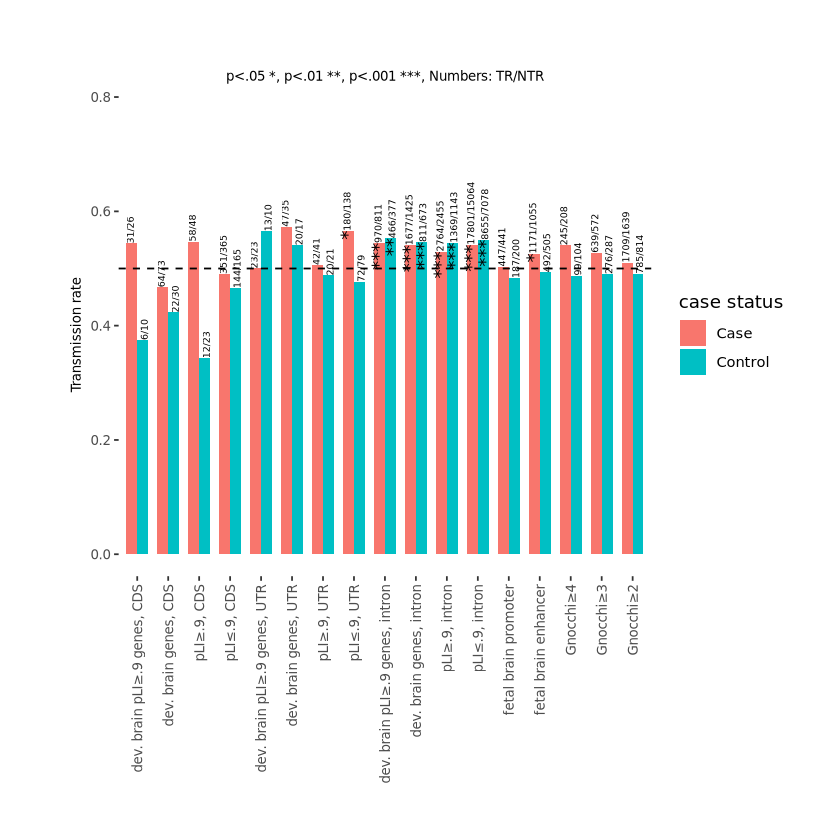

In [36]:
# plot binomial test results
print(fig_name2)
#y_sig = .05
#y_sig = 0.75
#y_sig = 0.3
y_sig = 3.5
#y_sig = 1.2
#y_sig = 1.7
size_txt = 8
size_sig = 4
label_pos = -.5
label_pos2 = 2.6

#, label = sum_case_con)
#  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
# , title = "Numbers up: #Tr./#non-Tr. controls, down:  #Tr./#non-Tr. cases"
# label=my_data2.melt$sig,

ggplot(my_data2.melt, aes(x = fts, y = TR_rate, fill = case_control, ymin=lb.bin , ymax=ub.bin, label=TR_rate)) +
  geom_bar(position = position_dodge(), stat = "identity", width = 0.7) +
  #geom_errorbar(position = position_dodge(width = 0.9), colour = "black") +
  geom_hline(yintercept = .5, linetype = "dashed", color = "black") +
  # from `ggfittext`
  #geom_bar_text(position = "dodge", aes(label = TR_rate), place = "top", grow = TRUE, 
  #              reflow = TRUE, min.size = 5, contrast = TRUE) +
  geom_text(aes(label = sig), position=position_dodge(width=0.9), angle=90, hjust=1, vjust=0.5) +
  geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
  labs(y = "Transmission rate", title = "p<.05 *, p<.01 **, p<.001 ***, Numbers: TR/NTR") +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt)
        #axis.line = element_line(),
       ) +
  scale_x_discrete(limits=fts, labels=fts_labels) +
  scale_fill_discrete(name = 'case status', labels = c("Case", "Control"))
  #scale_x_discrete(labels=my_data2.melt$fts_labels) 
  #+
  #annotate("text", x=1:dim(my_data2.melt)[1], y=y_sig, label= sig, size=size_sig) +
  #geom_text(aes(x = fts, y = label_pos, label = tr_case_ntr_case), angle=90, hjust=0, size=2) +
  #geom_text(aes(x = fts, y = label_pos2, label = tr_con_ntr_con), angle=90, hjust=0, size=2)
  # + 
  #ylim(-0.1, .46)
#, vjust=0, hjust=2

ggsave(fig_name2, width = 10, height = 6)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +

In [37]:
# make chi-squared test dataframe
my_data = data.frame('ORs' = ORs, 'pvals' = pvals, 'fts' = fts, 'fts_labels' = fts_labels, 
                     'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)
my_data$fts <- factor(my_data$fts, levels = my_data$fts)
#my_data <- my_data[!is.infinite(my_data$ORs_plus),]
get_pval_char <- function(pval) {
    if (is.na(pval)) {return('')}
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
    }
sig <- sapply(my_data$pvals, get_pval_char)
print(sig)
my_data$sig = sig
my_data

 [1] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""


ORs,pvals,fts,fts_labels,tr_case_ntr_case,tr_con_ntr_con,sig
<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1.9871795,0.36237121,PLIp9_DEV_BR_GENE_10_cds,"dev. brain pLI≥.9 genes, CDS",31/26,6/10,
1.1955168,0.70404150,DEV_BR_GENE_10_cds,"dev. brain genes, CDS",64/73,22/30,
2.3159722,0.05728195,PLIp9_cds,"pLI≥.9, CDS",58/48,12/23,
1.1018836,0.51989325,LOWPLI_cds,"pLI≤.9, CDS",351/365,144/165,
0.7692308,0.79824529,PLIp9_DEV_BR_GENE_10_utr,"dev. brain pLI≥.9 genes, UTR",23/23,13/10,
1.1414286,0.89456280,DEV_BR_GENE_10_utr,"dev. brain genes, UTR",47/35,20/17,
1.0756098,1.00000000,PLIp9_utr,"pLI≥.9, UTR",42/41,20/21,
1.4311594,0.08700430,LOWPLI_utr,"pLI≤.9, UTR",180/138,72/79,
0.9676233,0.72660205,PLIp9_DEV_BR_GENE_10_intron,"dev. brain pLI≥.9 genes, intron",970/811,466/377,


[1] "R_trans/transmission_chisq_test_all_SQ70_SAMPLES_SQ70_SAMPLES_freq0.05_clean.png"


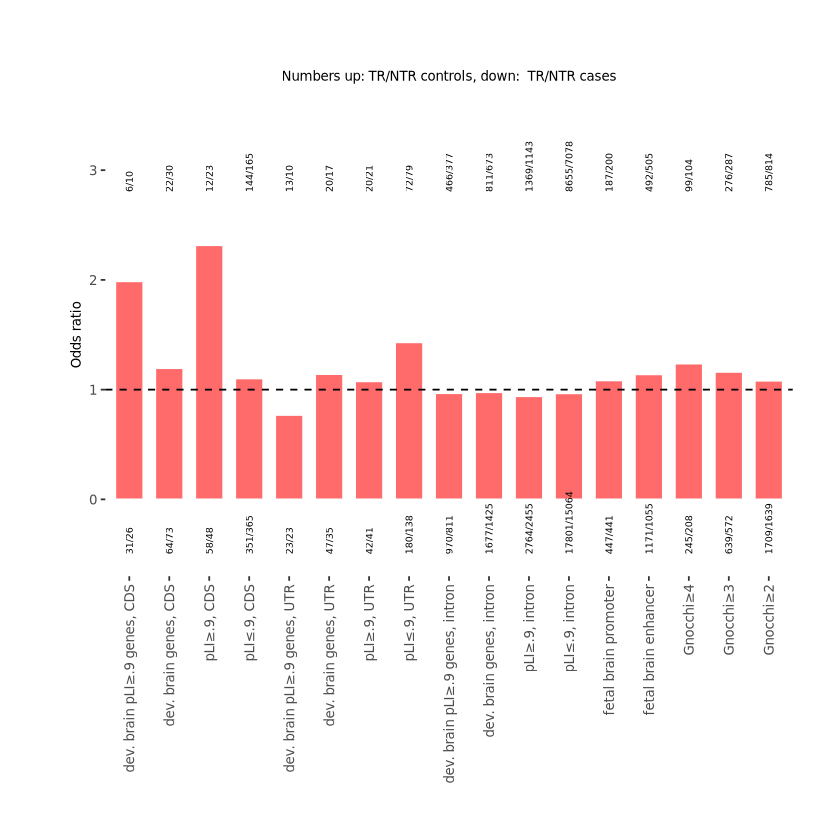

In [38]:
# plot chi-squared test results
print(fig_name1)
#y_sig = .05
#y_sig = 0.75
#y_sig = 0.3
y_sig = 3.5
#y_sig = 1.2
#y_sig = 1.7
size_txt = 8
size_sig = 4
label_pos = -.5
label_pos2 = 2.8

#, label = sum_case_con)
#  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
#

#ggplot(my_data, aes(x = fts, y = ORs, label = sprintf('%1.4f', ano_pval))) +
ggplot(my_data, aes(x = fts, y = ORs)) +
  geom_bar(stat = "identity", fill = "indianred1", color = "white", width = 0.7) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "black") +
  labs(y = "Odds ratio", title = "Numbers up: TR/NTR controls, down:  TR/NTR cases") +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt)
        #axis.line = element_line(),
       ) +
  scale_x_discrete(labels=my_data$fts_labels) +
  annotate("text", x=1:dim(my_data)[1], y=y_sig, label= sig, size=size_sig) +
  geom_text(aes(x = fts, y = label_pos, label = tr_case_ntr_case), angle=90, hjust=0, size=2) +
  geom_text(aes(x = fts, y = label_pos2, label = tr_con_ntr_con), angle=90, hjust=0, size=2)
  # + 
  #ylim(-0.1, .46)
#, vjust=0, hjust=2

ggsave(fig_name1, width = 5, height = 5)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +